# Data Storytelling

In [1]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
from mpl_toolkits.basemap import Basemap
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.optimize import curve_fit
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns
%matplotlib inline
import matplotlib.mlab as mlab
warnings.filterwarnings("ignore")
from scipy.stats import norm

In [2]:
top_airtpots= ['ATL', 'ORD', 'DFW', 'DEN', 'LAX', 'SFO', 'PHX', 'IAH', 'LAS','MSP']

In [3]:
airports=pd.read_csv('Capstone 1 - Airports.csv')

In [4]:
flights= pd.read_csv('Capstone 1 - Preparing Data(W&H).csv')

In [78]:
flights.DISTANCE.head()

0    1464.0
1    1747.0
2    1199.0
3    1635.0
4    1055.0
Name: DISTANCE, dtype: float64

In [6]:
533183/5819079

0.09162669900168051

In [7]:
original= pd.read_csv('flights.csv')

In [8]:
original.shape 

(5819079, 31)

In [9]:
airport_traffic =flights.ORIGIN_AIRPORT.groupby(flights.ORIGIN_AIRPORT).count().to_dict()

In [10]:
list(airport_traffic.keys())

['ATL', 'DEN', 'DFW', 'IAH', 'LAS', 'LAX', 'ORD', 'PHX', 'SEA', 'SFO']

In [11]:
airports['MAP']=airports.IATA_CODE
airports['MAP']=airports['MAP'].map(airport_traffic)
airports['MAP']

0    45677
1    56186
2    52534
3    35867
4    54578
5    75497
6    56949
7    50385
8    42857
9    62653
Name: MAP, dtype: int64

In [12]:
airports

,Unnamed: 0,index,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,Timezone,Timestamp,Timezone_Diff,MAP
0,0,20,ATL,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.64044,-84.42694,America/Chicago,1.420092e+09,0.0,45677
1,1,85,DEN,Denver International Airport,Denver,CO,USA,39.85841,-104.66700,America/Denver,1.420096e+09,-1.0,56186
2,2,86,DFW,Dallas/Fort Worth International Airport,Dallas-Fort Worth,TX,USA,32.89595,-97.03720,America/Chicago,1.420092e+09,0.0,52534
3,3,151,IAH,George Bush Intercontinental Airport,Houston,TX,USA,29.98047,-95.33972,America/Chicago,1.420092e+09,0.0,35867
4,4,174,LAS,McCarran International Airport,Las Vegas,NV,USA,36.08036,-115.15233,America/Los_Angeles,1.420099e+09,-2.0,54578
5,5,176,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,America/Los_Angeles,1.420099e+09,-2.0,75497
6,6,228,ORD,Chicago O'Hare International Airport,Chicago,IL,USA,41.97960,-87.90446,America/Chicago,1.420092e+09,0.0,56949
7,7,239,PHX,Phoenix Sky Harbor International Airport,Phoenix,AZ,USA,33.43417,-112.00806,America/Phoenix,1.420096e+09,-1.0,50385
8,8,277,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,America/Los_Angeles,1.420099e+09,-2.0,42857
9,9,278,SFO,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484,America/Los_Angeles,1.420099e+09,-2.0,62653


Text(0.5, 1.0, 'Number of Flights\n')

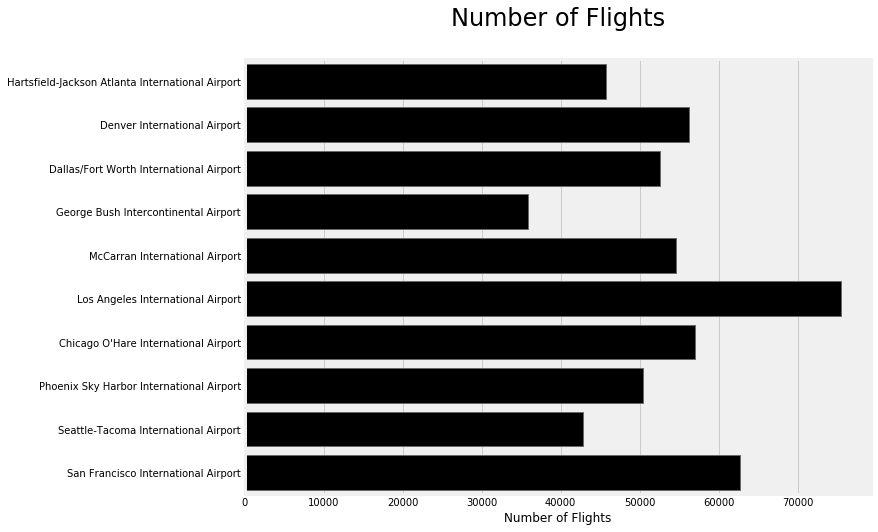

In [13]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x="MAP", y="AIRPORT", data=airports,color ='black')
plt.xlabel('Number of Flights')
plt.ylabel("")
plt.title('Number of Flights\n',size=24)

In [14]:
airport_traffic

{'ATL': 45677,
 'DEN': 56186,
 'DFW': 52534,
 'IAH': 35867,
 'LAS': 54578,
 'LAX': 75497,
 'ORD': 56949,
 'PHX': 50385,
 'SEA': 42857,
 'SFO': 62653}

2283.85
2809.3
2626.7
1793.35
2728.9
3774.85
2847.45
2519.25
2142.85
3132.65


Text(0.5, 1.0, 'LOCATION & NUMBER OF TRAFFICS OF THE TOP 10 ORIGIN AIRPORTS')

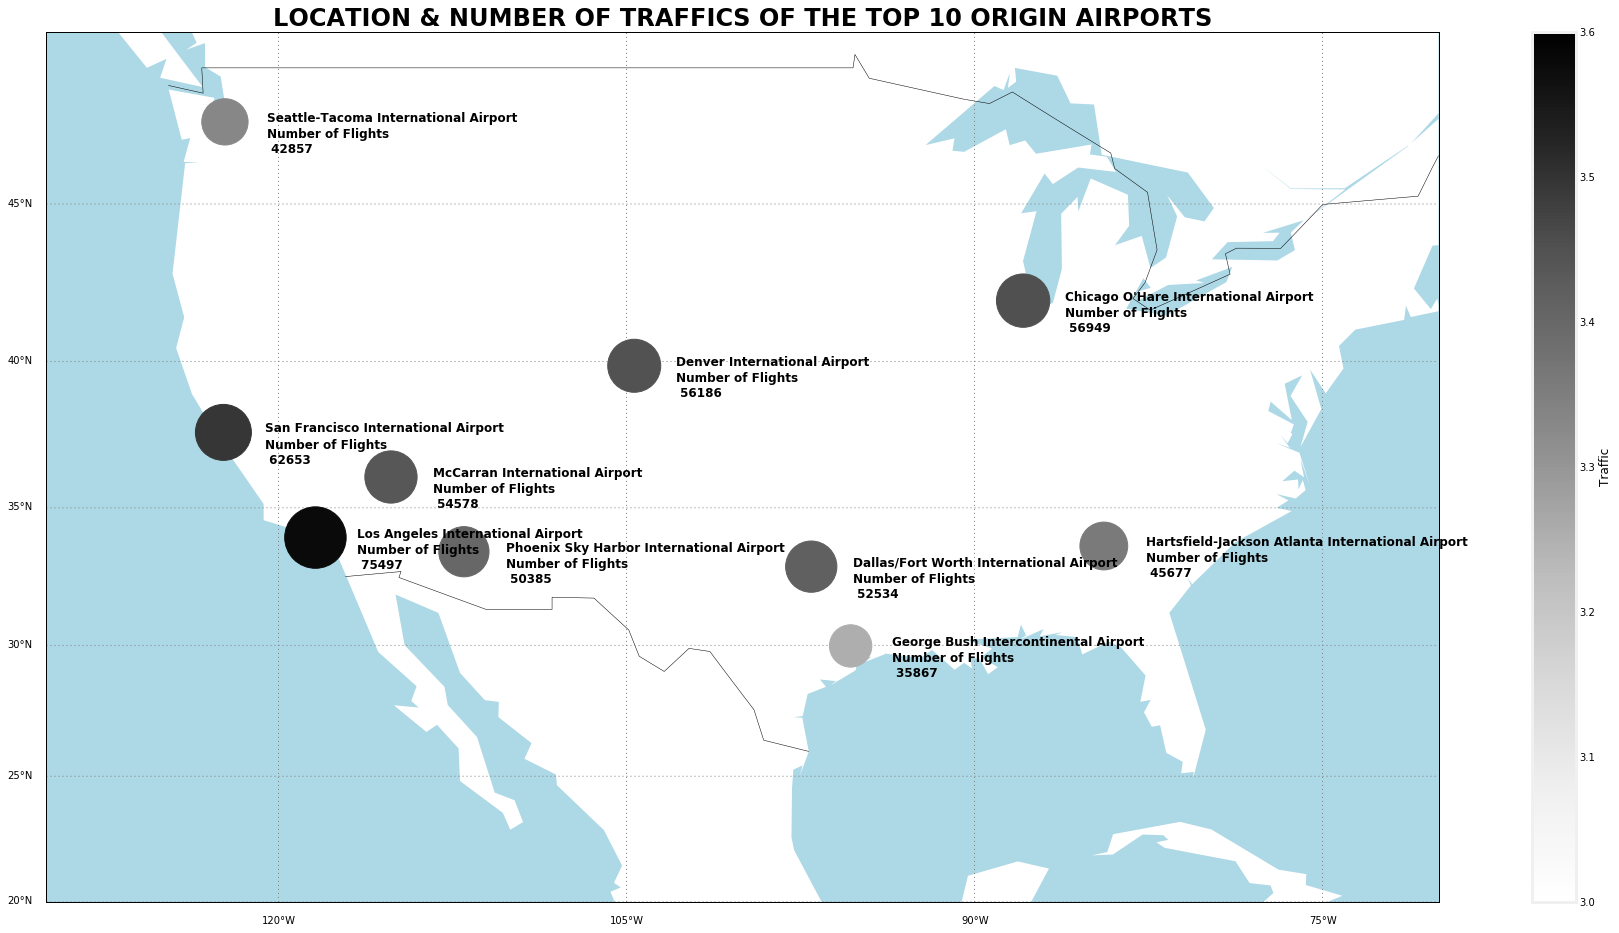

In [15]:
 #create new figure, axes instances.
fig = plt.figure(num=None, figsize=(30, 16) )
m = Basemap(projection='merc',llcrnrlat=20,urcrnrlat=50,llcrnrlon=-130,urcrnrlon=-70,resolution='c')
m.drawcountries()
m.drawmapboundary(fill_color='lightblue')
m.drawparallels(np.arange(0.,90.,5.),color='gray',dashes=[1,3],labels=[1,0,0,0])
m.drawmeridians(np.arange(0.,360.,15.),color='gray',dashes=[1,3],labels=[0,0,0,1])
m.fillcontinents(color='white',lake_color='lightblue')
lons = airports.LONGITUDE.tolist()
lats = airports.LATITUDE.tolist()

x, y = m(lons, lats)
s=[]
for i in range(len(airports)):
    print(airports.MAP[i]/20)
    s.append(airports.MAP[i]/20)
    
for i in range(10):
    plt.text(x[i]+200000,y[i],airports.AIRPORT[i],zorder=10,color='black',size=12,weight='bold')
    plt.text(x[i]+200000,y[i]-150000,"Number of Flights\n "+str(airports.MAP[i]),zorder=10,color='black',size=12,weight='bold')

plt.scatter(x, y,marker='o',zorder=10,s=s, c=np.log10(s), cmap='Greys')
plt.colorbar(label='Traffic')
plt.clim(3,3.6)

plt.title('LOCATION & NUMBER OF TRAFFICS OF THE TOP 10 ORIGIN AIRPORTS', size=24,weight='bold')


#plt.colorbar(orientation='vertical', shrink = 0.5)
#plt.legend([red_dot, (red_dot, white_cross)], ["Attr A", "Attr A+B"])

In [16]:
traffic= flights[['ORIGIN_AIRPORT','DESTINATION_AIRPORT']]
traffic = pd.merge(traffic,airports[['LATITUDE','LONGITUDE']],left_on=traffic.ORIGIN_AIRPORT,right_on=airports.IATA_CODE,how='inner')
traffic=traffic.iloc[:,1:]
traffic.head()

,ORIGIN_AIRPORT,DESTINATION_AIRPORT,LATITUDE,LONGITUDE
0,SFO,DFW,37.619,-122.37484
1,SFO,IAH,37.619,-122.37484
2,SFO,DEN,37.619,-122.37484
3,SFO,DEN,37.619,-122.37484
4,SFO,ATL,37.619,-122.37484


In [17]:
traffic = pd.merge(traffic,airports[['LATITUDE','LONGITUDE']],left_on=traffic.DESTINATION_AIRPORT,right_on=airports.IATA_CODE,how='inner')
traffic=traffic.iloc[:,1:]
traffic.shape

(533183, 6)

In [18]:
traffic['KEY']=traffic.ORIGIN_AIRPORT+traffic.DESTINATION_AIRPORT
traffic_2 =traffic.groupby(traffic['KEY']).mean()
traffic_2

,LATITUDE_x,LONGITUDE_x,LATITUDE_y,LONGITUDE_y
KEY,,,,
ATLDEN,33.64044,-84.42694,39.85841,-104.66700
ATLDFW,33.64044,-84.42694,32.89595,-97.03720
ATLIAH,33.64044,-84.42694,29.98047,-95.33972
ATLLAS,33.64044,-84.42694,36.08036,-115.15233
ATLLAX,33.64044,-84.42694,33.94254,-118.40807
ATLORD,33.64044,-84.42694,41.97960,-87.90446
ATLPHX,33.64044,-84.42694,33.43417,-112.00806
ATLSEA,33.64044,-84.42694,47.44898,-122.30931
ATLSFO,33.64044,-84.42694,37.61900,-122.37484


2283.85
2809.3
2626.7
1793.35
2728.9
3774.85
2847.45
2519.25
2142.85
3132.65


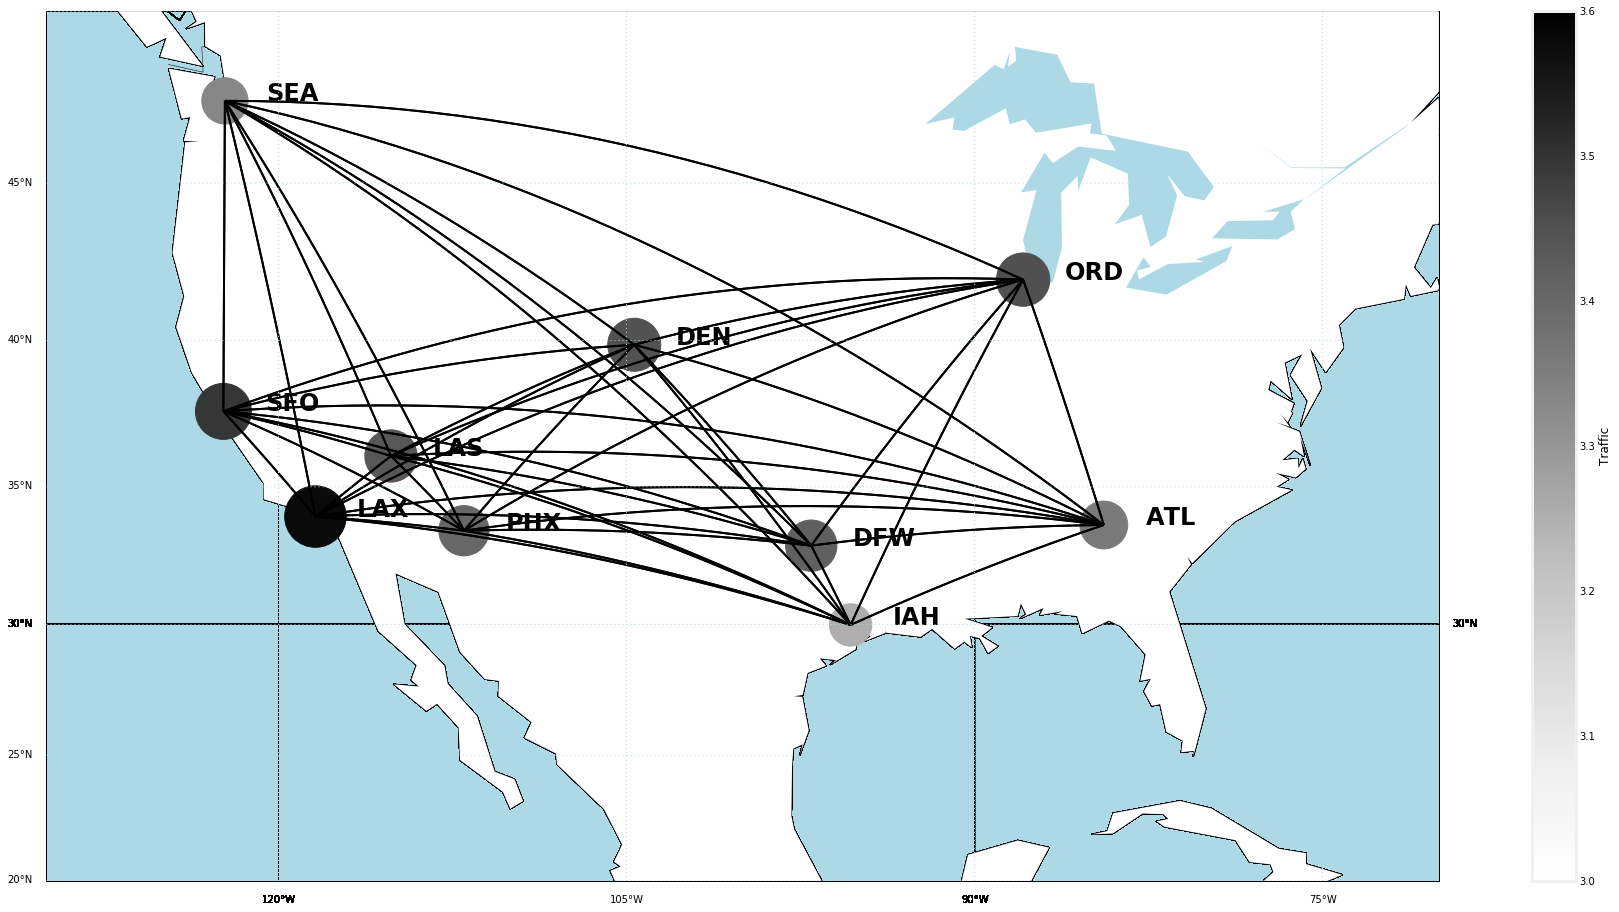

In [19]:
fig = plt.figure(num=None, figsize=(30, 16) )
m = Basemap(projection='merc',llcrnrlat=20,urcrnrlat=50,llcrnrlon=-130,urcrnrlon=-70,resolution='c')
m.drawcountries()
m.drawmapboundary(fill_color='lightblue')
m.drawparallels(np.arange(0.,90.,5.),color='lightblue',dashes=[1,3],labels=[1,0,0,0],zorder=12)
m.drawmeridians(np.arange(0.,360.,15.),color='lightblue',dashes=[1,3],labels=[0,0,0,1],zorder=12)
m.fillcontinents(color='white',lake_color='lightblue',zorder=8)

for i in range(len(traffic_2)):
    nylat = traffic_2.LATITUDE_x[i]; nylon = traffic_2.LONGITUDE_x[i]
    lonlat = traffic_2.LATITUDE_y[i]; lonlon = traffic_2.LONGITUDE_y[i]
    # draw great circle route between NY and London
    m.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='k',zorder=11)
    m.drawcoastlines()
    m.fillcontinents()
    # draw parallels
    m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
    # draw meridians
    m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])
    

lons = airports.LONGITUDE.tolist()
lats = airports.LATITUDE.tolist()

x, y = m(lons, lats)
s=[]
for i in range(len(airports)):
    print(airports.MAP[i]/20)
    s.append(airports.MAP[i]/20)
    
for i in range(10):
    plt.text(x[i]+200000,y[i],airports.IATA_CODE[i],zorder=10,color='black',size=24,weight='bold')
    #plt.text(x[i]+200000,y[i]-150000,"Number of Flights\n"+str(airports.MAP[i]),zorder=10,color='black',size=12,weight='bold')

plt.scatter(x, y,marker='o',zorder=10,s=s, c=np.log10(s), cmap='Greys')
plt.colorbar(label='Traffic')
plt.clim(3,3.6)

    

ax.set_title('Great Circle from New York to London')
plt.show()

In [20]:
alls=flights.SCHEDULED_ARRIVAL.count()
cancelled=flights.SCHEDULED_ARRIVAL.count()-flights.DEPARTURE_TIME.count()
print('Cancelled = {0:.2g}'.format(cancelled/alls*100))
print('Number of Cancelled = {}'.format(cancelled))

Cancelled = 0.96
Number of Cancelled = 5142


In [21]:
flights.shape

(533183, 73)

In [22]:
flights.CANCELLED[flights.CANCELLED==1].count()

5398

In [23]:
series =flights[['SCHEDULED_DEPARTURE_DT','CANCELLED' ]]
series.index=series.SCHEDULED_DEPARTURE_DT
series=series[['CANCELLED']]


In [24]:
series.index= pd.to_datetime(series.index)

In [25]:
series_day = series.resample('D').mean()
series_day.head()

,CANCELLED
SCHEDULED_DEPARTURE_DT,
2015-01-01,0.016641
2015-01-02,0.006596
2015-01-03,0.010271
2015-01-04,0.008874
2015-01-05,0.006743


In [26]:
series_month = series.resample('M').mean()
series_month.head()

,CANCELLED
SCHEDULED_DEPARTURE_DT,
2015-01-31,0.008877
2015-02-28,0.025300
2015-03-31,0.009206
2015-04-30,0.008009
2015-05-31,0.008581


In [27]:
series_A = series.resample('A-DEC').mean()
series_A.head()

,CANCELLED
SCHEDULED_DEPARTURE_DT,
2015-12-31,0.010124


In [28]:
series_Q = series.resample('Q-DEC').mean()
series_Q.head()

,CANCELLED
SCHEDULED_DEPARTURE_DT,
2015-03-31,0.014008
2015-06-30,0.011063
2015-09-30,0.005955
2015-12-31,0.009918


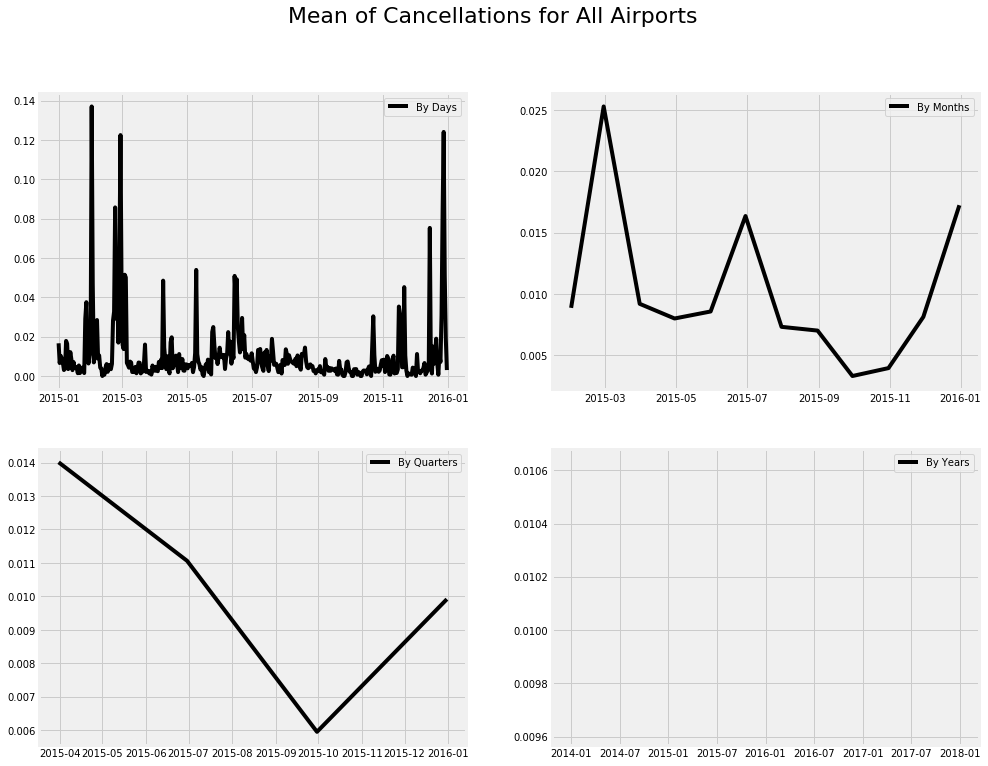

In [29]:
fig = plt.figure(figsize=[15, 12])
plt.suptitle('Mean of Cancellations for All Airports', fontsize=22)

plt.subplot(221)
plt.plot(series_day.CANCELLED, '-', label='By Days',color='k')
plt.legend()

plt.subplot(222)
plt.plot(series_month.CANCELLED, '-', label='By Months',color='k')
plt.legend()

plt.subplot(223)
plt.plot(series_Q.CANCELLED, '-', label='By Quarters',color='k')
plt.legend()

plt.subplot(224)
plt.plot(series_A.CANCELLED, '-', label='By Years',color='k')
plt.legend()

# plt.tight_layout()
plt.show()

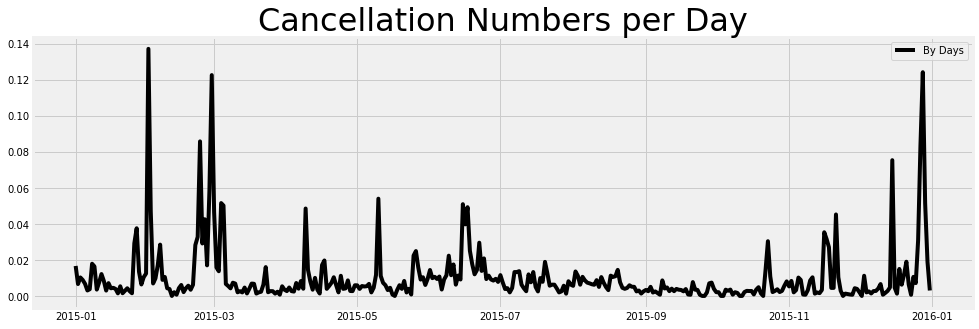

In [30]:
fig = plt.figure(figsize=[15, 5])
plt.plot(series_day.CANCELLED, '-', label='By Days',color='k')
plt.title('Cancellation Numbers per Day',size=32)
plt.legend()

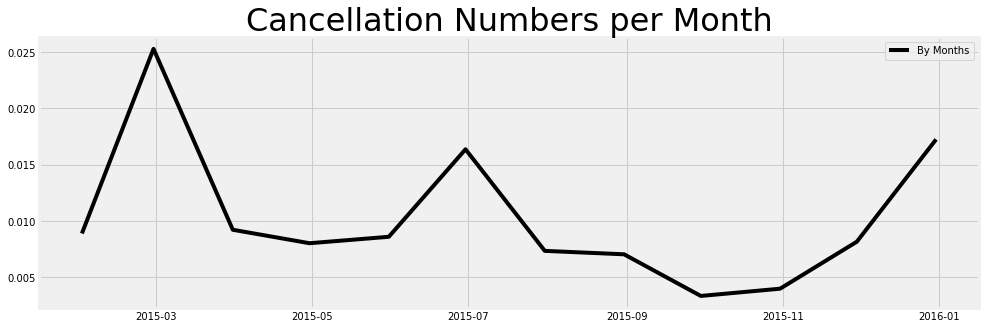

In [31]:
fig = plt.figure(figsize=[15, 5])
plt.plot(series_month.CANCELLED, '-', label='By Months',color='k')
plt.title('Cancellation Numbers per Month',size=32)
plt.legend()

In [32]:
series_DW =flights[['SCHEDULED_DEPARTURE_DT','CANCELLED','DAY_OF_WEEK' ]]
series_DW.index=series_DW.SCHEDULED_DEPARTURE_DT
series_DW =series_DW[['CANCELLED','DAY_OF_WEEK']]
series_DW=series_DW[series_DW.CANCELLED==1]
series_DW=series_DW[['DAY_OF_WEEK']]
a= series_DW.DAY_OF_WEEK.groupby(series_DW.DAY_OF_WEEK).count()
a

DAY_OF_WEEK
1    1119
2     862
3     687
4     716
5     617
6     580
7     817
Name: DAY_OF_WEEK, dtype: int64

Text(0.5, 1.0, 'Flight Cancellation Per Day of the Week')

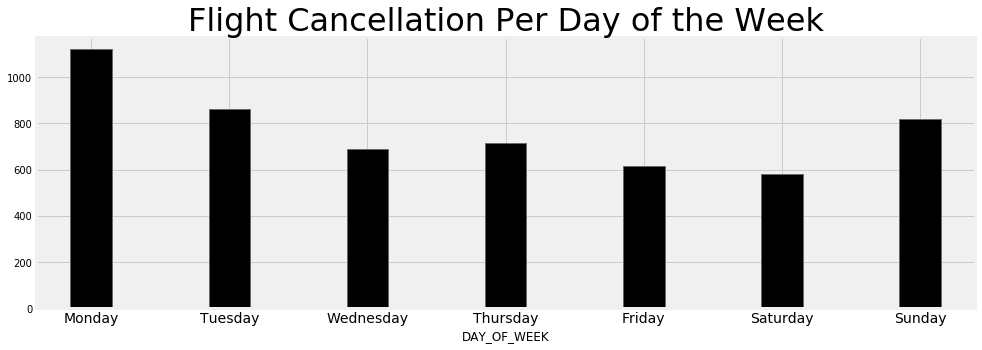

In [33]:
fig = plt.figure(figsize=[15, 5])
a.plot.bar(width=.3,color='k')
plt.xticks(np.arange(7),['Monday','Tuesday','Wednesday', 'Thursday','Friday','Saturday','Sunday'],rotation=0,size=14)
plt.title('Flight Cancellation Per Day of the Week',size=32)

In [34]:
b=series_month.CANCELLED

Text(0.5, 1.0, 'Flight Cancellation Per Month')

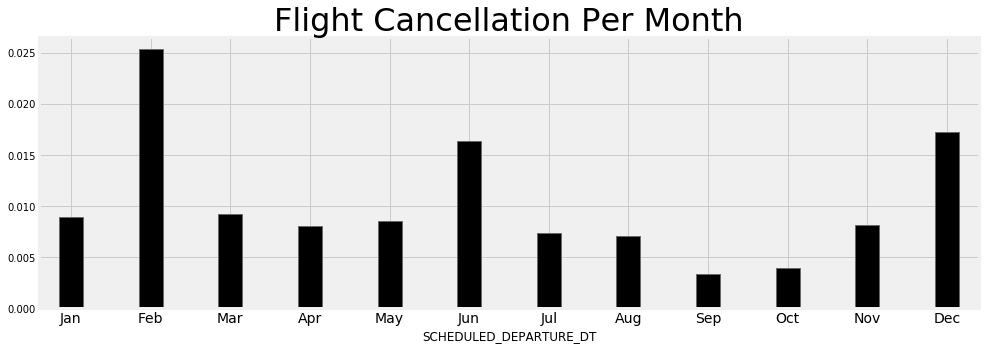

In [35]:
ig = plt.figure(figsize=[15, 5])
b.plot.bar(width=.3,color='k')
plt.xticks(np.arange(12),['Jan','Feb','Mar', 'Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0,size=14)
plt.title('Flight Cancellation Per Month',size=32)

In [36]:
series3 =flights[['SCHEDULED_DEPARTURE_DT','CANCELLED' ]]
series3= series3.groupby(flights.SCHEDULED_DEPARTURE_DT).count()
series3.index=pd.to_datetime(series3.index)
series3= series3[['SCHEDULED_DEPARTURE_DT']]

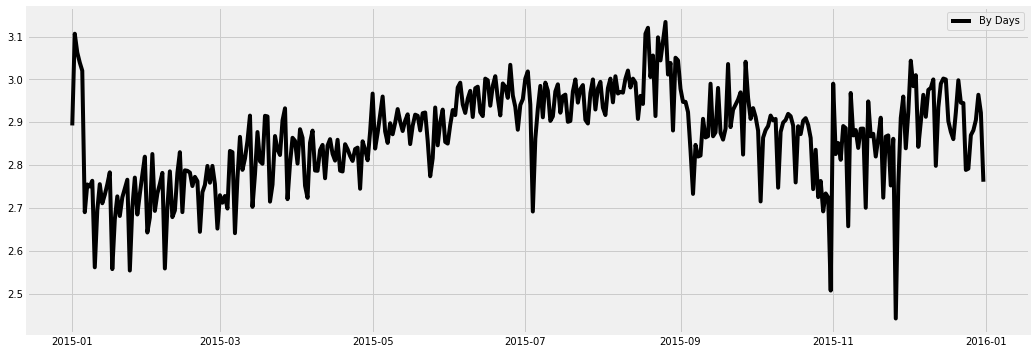

In [37]:
plt.figure(figsize=(16,6))
series3_day = series3.resample('D').mean()
series3_day.head()
plt.plot(series3_day, '-', label='By Days',color='k')
plt.legend()

Text(0.5, 1.0, 'Number of Flight vs Number of Cancallation')

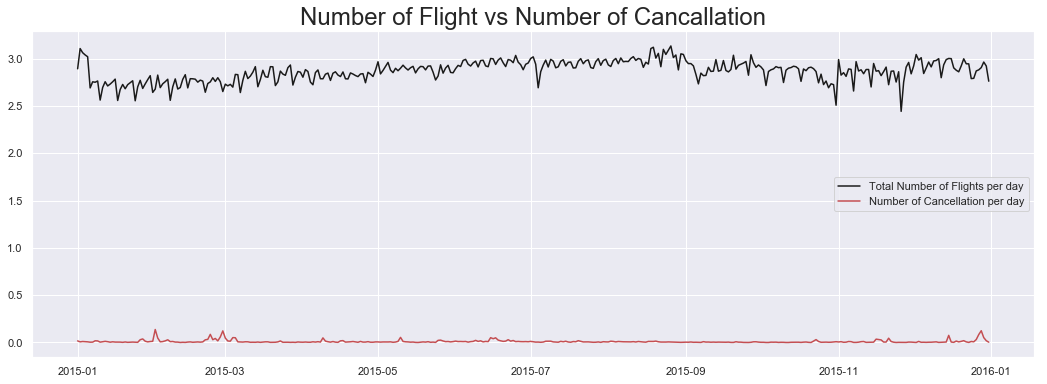

In [38]:
sns.set()
plt.figure(figsize=(16,6))
plt.plot(series3_day.SCHEDULED_DEPARTURE_DT, '-', label='Total Number of Flights per day',color='k')
plt.legend()
plt.plot(series_day.CANCELLED, '-', label='Number of Cancellation per day',color='r')
plt.legend()
plt.title("Number of Flight vs Number of Cancallation",size=24)




Text(0.5, 1.0, 'Cancellation Ratio ')

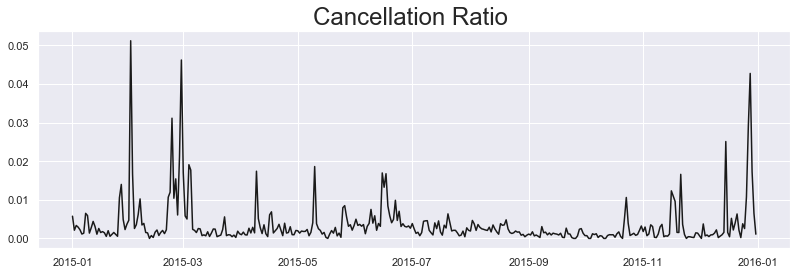

In [39]:
sns.set()
plt.figure(figsize=(12,4))
plt.plot((series_day.CANCELLED/series3_day.SCHEDULED_DEPARTURE_DT),label='Total Number of Flights per day',color='k')
plt.title("Cancellation Ratio ",size=24)

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
#import warning
from itertools import product
from datetime import datetime
#warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

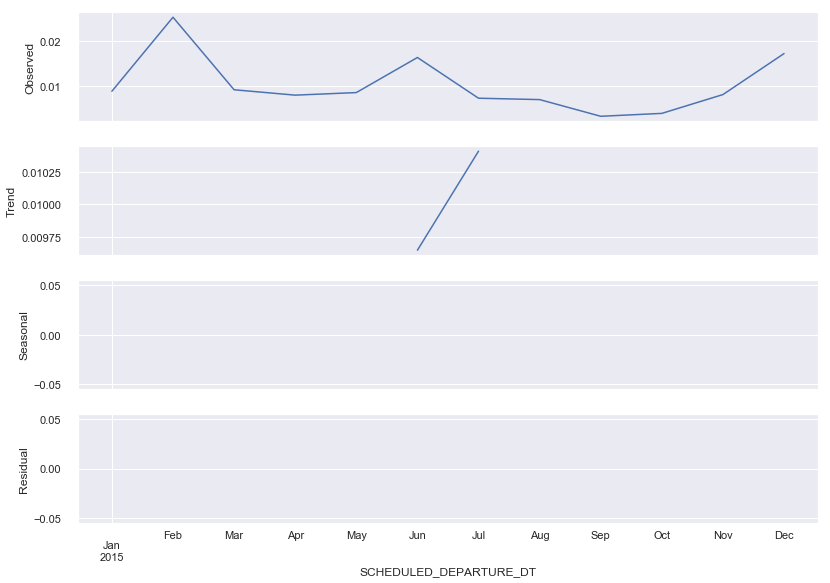

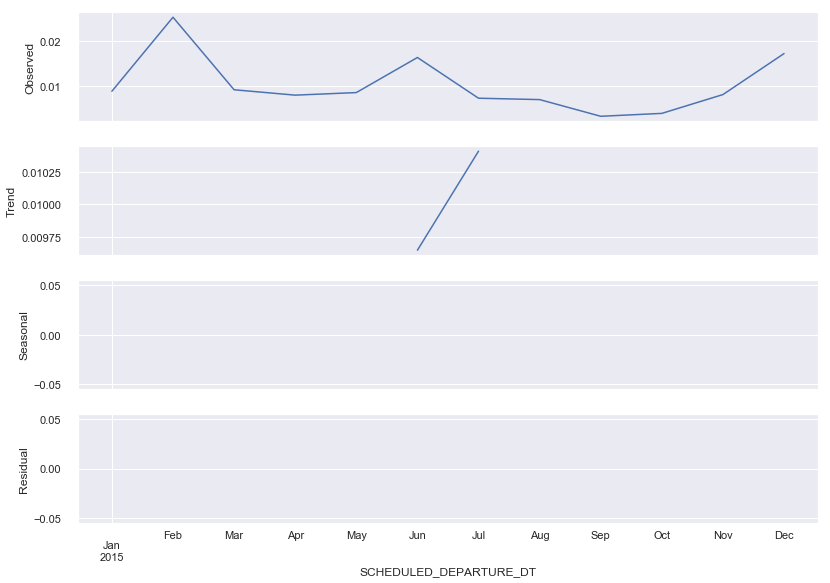

In [41]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sm.tsa.seasonal_decompose(series_month.CANCELLED,freq=11).plot()

In [42]:
holiday =flights[['SCHEDULED_DEPARTURE_DT','IsHoliday' ]]
holiday.index=holiday.SCHEDULED_DEPARTURE_DT
holiday.index= pd.to_datetime(holiday.index)
holiday=holiday[['IsHoliday']]
holiday.head()

,IsHoliday
SCHEDULED_DEPARTURE_DT,
2015-01-01 00:30:00,1
2015-01-01 00:30:00,1
2015-01-01 00:30:00,1
2015-01-01 00:48:00,1
2015-01-01 01:03:00,1


In [43]:
holiday_day = holiday.resample('D').mean()
holiday_day.head()

,IsHoliday
SCHEDULED_DEPARTURE_DT,
2015-01-01,1
2015-01-02,0
2015-01-03,0
2015-01-04,0
2015-01-05,0


In [44]:
series_day.head()

,CANCELLED
SCHEDULED_DEPARTURE_DT,
2015-01-01,0.016641
2015-01-02,0.006596
2015-01-03,0.010271
2015-01-04,0.008874
2015-01-05,0.006743


Text(0.5, 1.0, 'Holidays vs Cancellation')

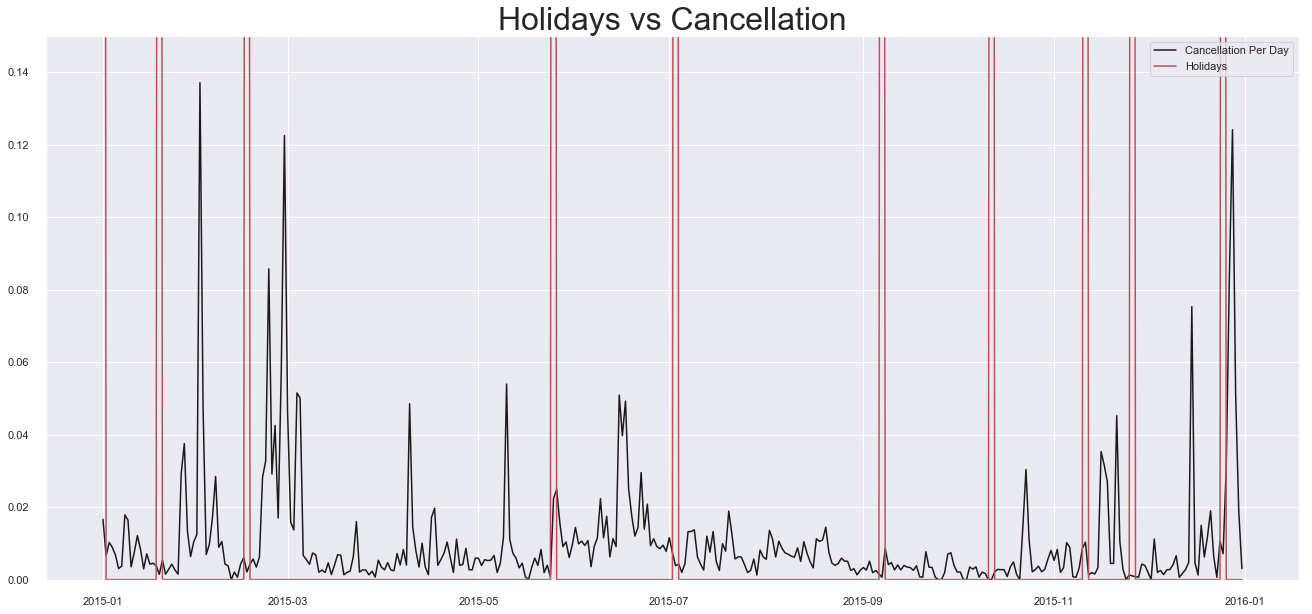

In [45]:
plt.figure(figsize=(20,10))
plt.plot(series_day.CANCELLED, '-', label='Cancellation Per Day',color='k')
plt.plot(holiday_day.IsHoliday, '-', label='Holidays',color='r')
plt.legend()
plt.ylim(0,.15)
plt.title('Holidays vs Cancellation',size=32)
#plt.fill_between([-36800.2,36800.2], 0, .14, facecolor='red', alpha = .25, interpolate=True)

In [46]:
flights.head()

,Unnamed: 0,Unnamed: 0.1,DATE,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IsHoliday,Holiday
0,0,0,2015-01-01 00:00:00,2015,1,1,4,AA,1112,N3LAAA,...,-13.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1,New Year's Day
1,1,1,2015-01-01 00:00:00,2015,1,1,4,DL,1173,N826DN,...,-15.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1,New Year's Day
2,2,2,2015-01-01 00:00:00,2015,1,1,4,DL,2336,N958DN,...,-30.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1,New Year's Day
3,3,3,2015-01-01 00:00:00,2015,1,1,4,UA,1197,N78448,...,-7.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1,New Year's Day
4,4,4,2015-01-01 00:00:00,2015,1,1,4,NK,214,N632NK,...,-1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1,New Year's Day


In [47]:
airports.head()

,Unnamed: 0,index,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,Timezone,Timestamp,Timezone_Diff,MAP
0,0,20,ATL,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.64044,-84.42694,America/Chicago,1.420092e+09,0.0,45677
1,1,85,DEN,Denver International Airport,Denver,CO,USA,39.85841,-104.66700,America/Denver,1.420096e+09,-1.0,56186
2,2,86,DFW,Dallas/Fort Worth International Airport,Dallas-Fort Worth,TX,USA,32.89595,-97.03720,America/Chicago,1.420092e+09,0.0,52534
3,3,151,IAH,George Bush Intercontinental Airport,Houston,TX,USA,29.98047,-95.33972,America/Chicago,1.420092e+09,0.0,35867
4,4,174,LAS,McCarran International Airport,Las Vegas,NV,USA,36.08036,-115.15233,America/Los_Angeles,1.420099e+09,-2.0,54578


In [48]:
flights['ORIGIN_AIRPORT_NAME']=flights['ORIGIN_AIRPORT']
airport_dict= airports[['IATA_CODE','AIRPORT']]
airport_dict.index= airport_dict.IATA_CODE
airport_dict=airport_dict[['AIRPORT']]
airport_dict.to_dict()['AIRPORT']
flights['ORIGIN_AIRPORT_NAME']= flights['ORIGIN_AIRPORT_NAME'].replace(airport_dict.to_dict()['AIRPORT'])
flights['ORIGIN_AIRPORT_NAME'].head()

0    San Francisco International Airport
1         McCarran International Airport
2           Denver International Airport
3    San Francisco International Airport
4         McCarran International Airport
Name: ORIGIN_AIRPORT_NAME, dtype: object

In [49]:
Origin_total_flights= flights.ORIGIN_AIRPORT_NAME.groupby(flights.ORIGIN_AIRPORT_NAME).count()
Origin_total_flights

ORIGIN_AIRPORT_NAME
Chicago O'Hare International Airport                56949
Dallas/Fort Worth International Airport             52534
Denver International Airport                        56186
George Bush Intercontinental Airport                35867
Hartsfield-Jackson Atlanta International Airport    45677
Los Angeles International Airport                   75497
McCarran International Airport                      54578
Phoenix Sky Harbor International Airport            50385
San Francisco International Airport                 62653
Seattle-Tacoma International Airport                42857
Name: ORIGIN_AIRPORT_NAME, dtype: int64

In [50]:
Origin_total_cancellation= flights.CANCELLED[flights.CANCELLED==1].groupby(flights.ORIGIN_AIRPORT_NAME).count()
Origin_total_cancellation

ORIGIN_AIRPORT_NAME
Chicago O'Hare International Airport                773
Dallas/Fort Worth International Airport             846
Denver International Airport                        483
George Bush Intercontinental Airport                359
Hartsfield-Jackson Atlanta International Airport    302
Los Angeles International Airport                   871
McCarran International Airport                      443
Phoenix Sky Harbor International Airport            352
San Francisco International Airport                 754
Seattle-Tacoma International Airport                215
Name: CANCELLED, dtype: int64

In [51]:
Org_cancallation_ratio = Origin_total_cancellation/Origin_total_flights

Text(0.5, 1.0, 'Cancellation Ratio Per Airport')

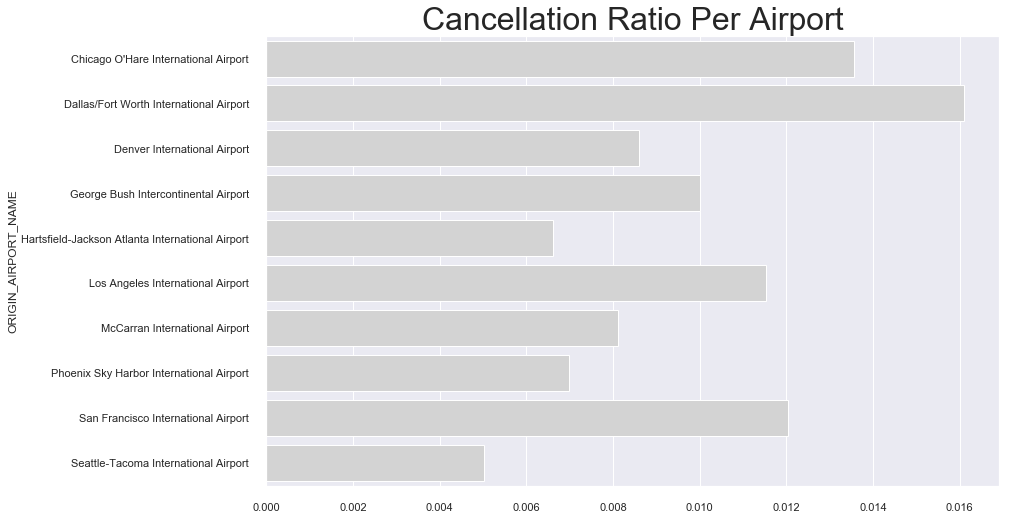

In [52]:
sns.barplot(list(Org_cancallation_ratio),Org_cancallation_ratio.index, color='#D3D3D3' )
#sns.boxenplot(list(Org_cancallation_ratio),Org_cancallation_ratio.index)
plt.xlabel=''
plt.ylabel='Deneme'
plt.title("Cancellation Ratio Per Airport",size=32)


In [53]:
flights['DES_AIRPORT_NAME']=flights['DESTINATION_AIRPORT']
airport_dict= airports[['IATA_CODE','AIRPORT']]
airport_dict.index= airport_dict.IATA_CODE
airport_dict=airport_dict[['AIRPORT']]
airport_dict.to_dict()['AIRPORT']
flights['DES_AIRPORT_NAME']= flights['DES_AIRPORT_NAME'].replace(airport_dict.to_dict()['AIRPORT'])
flights['DES_AIRPORT_NAME'].head()

0             Dallas/Fort Worth International Airport
1    Hartsfield-Jackson Atlanta International Airport
2    Hartsfield-Jackson Atlanta International Airport
3                George Bush Intercontinental Airport
4             Dallas/Fort Worth International Airport
Name: DES_AIRPORT_NAME, dtype: object

In [54]:
Dest_total_flights= flights.DES_AIRPORT_NAME.groupby(flights.DES_AIRPORT_NAME).count()
Dest_total_flights

DES_AIRPORT_NAME
Chicago O'Hare International Airport                57329
Dallas/Fort Worth International Airport             52076
Denver International Airport                        54784
George Bush Intercontinental Airport                35673
Hartsfield-Jackson Atlanta International Airport    45540
Los Angeles International Airport                   74934
McCarran International Airport                      54069
Phoenix Sky Harbor International Airport            49875
San Francisco International Airport                 61816
Seattle-Tacoma International Airport                47087
Name: DES_AIRPORT_NAME, dtype: int64

In [55]:
Dest_total_cancellation= flights.CANCELLED[flights.CANCELLED==1].groupby(flights.DES_AIRPORT_NAME).count()
Dest_total_cancellation

DES_AIRPORT_NAME
Chicago O'Hare International Airport                796
Dallas/Fort Worth International Airport             853
Denver International Airport                        457
George Bush Intercontinental Airport                412
Hartsfield-Jackson Atlanta International Airport    275
Los Angeles International Airport                   819
McCarran International Airport                      353
Phoenix Sky Harbor International Airport            421
San Francisco International Airport                 775
Seattle-Tacoma International Airport                237
Name: CANCELLED, dtype: int64

In [56]:
Dest_cancallation_ratio = Dest_total_cancellation/Dest_total_flights

Text(0.5, 1.0, 'Cancellation Ratio Per Airport')

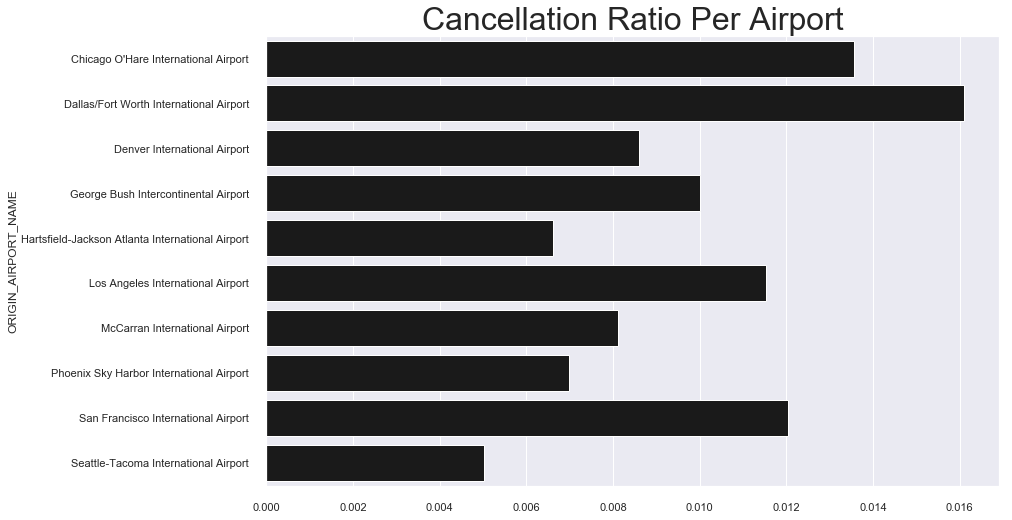

In [57]:
sns.barplot(list(Org_cancallation_ratio),Org_cancallation_ratio.index ,color='k')
#sns.boxenplot(list(Org_cancallation_ratio),Org_cancallation_ratio.index)
plt.xlabel=''
plt.ylabel='Deneme'
plt.title("Cancellation Ratio Per Airport",size=32)


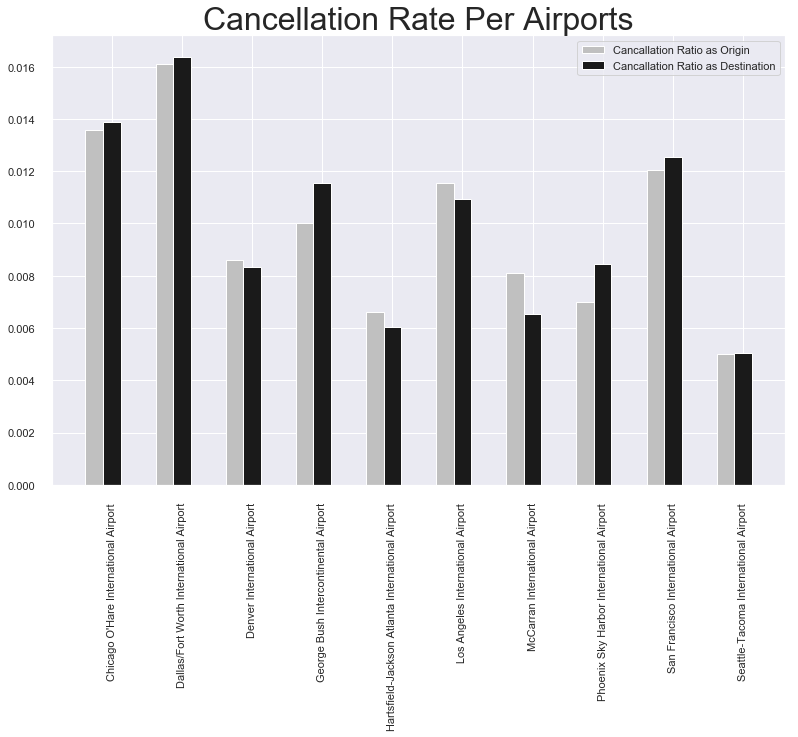

In [58]:
df1=pd.DataFrame(Org_cancallation_ratio, columns=['Org'])
df2=pd.DataFrame(Dest_cancallation_ratio, columns=['Dest'])
df=df1
df['Dest']=''
df['Dest']=df2.Dest

# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = df.Org
bars2 = df.Dest

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.bar(r1, bars1, color='#C0C0C0', width=barWidth, edgecolor='white', label='Cancallation Ratio as Origin')
plt.bar(r2, bars2, color='k', width=barWidth, edgecolor='white', label='Cancallation Ratio as Destination')

 
# Add xticks on the middle of the group bars
plt.xticks([r + barWidth for r in range(len(bars1))], df.index,rotation=90)
 
# Create legend & Show graphic
plt.title('Cancellation Rate Per Airports',size=32)

plt.legend()
plt.show()


In [59]:
df


,Org,Dest
ORIGIN_AIRPORT_NAME,,
Chicago O'Hare International Airport,0.013574,0.013885
Dallas/Fort Worth International Airport,0.016104,0.016380
Denver International Airport,0.008596,0.008342
George Bush Intercontinental Airport,0.010009,0.011549
Hartsfield-Jackson Atlanta International Airport,0.006612,0.006039
Los Angeles International Airport,0.011537,0.010930
McCarran International Airport,0.008117,0.006529
Phoenix Sky Harbor International Airport,0.006986,0.008441
San Francisco International Airport,0.012035,0.012537


In [60]:
airlines= pd.read_csv('airlines.csv')

In [61]:
flights['AIRLINE_NAME']=flights['AIRLINE']
airport_dict= airlines[['IATA_CODE','AIRLINE']]
airport_dict.index= airport_dict.IATA_CODE
airport_dict=airport_dict[['AIRLINE']]
airport_dict.to_dict()['AIRLINE']
flights['AIRLINE_NAME']= flights['AIRLINE_NAME'].replace(airport_dict.to_dict()['AIRLINE'])
flights['AIRLINE_NAME'].head()

0    American Airlines Inc.
1      Delta Air Lines Inc.
2      Delta Air Lines Inc.
3     United Air Lines Inc.
4          Spirit Air Lines
Name: AIRLINE_NAME, dtype: object

In [62]:
Dest_total_airlines= flights.AIRLINE_NAME.groupby(flights.AIRLINE_NAME).count()
Dest_total_airlines


AIRLINE_NAME
Alaska Airlines Inc.             33957
American Airlines Inc.          117713
American Eagle Airlines Inc.       495
Atlantic Southeast Airlines       1680
Delta Air Lines Inc.             63132
Frontier Airlines Inc.           23991
JetBlue Airways                   1581
Skywest Airlines Inc.            28964
Southwest Airlines Co.           72252
Spirit Air Lines                 23172
US Airways Inc.                  16592
United Air Lines Inc.           128182
Virgin America                   21472
Name: AIRLINE_NAME, dtype: int64

In [63]:
Dest_total_airlines_canl= flights.CANCELLED[flights.CANCELLED==1].groupby(flights.AIRLINE_NAME).count()
Dest_total_airlines_canl

AIRLINE_NAME
Alaska Airlines Inc.              76
American Airlines Inc.          1708
American Eagle Airlines Inc.      26
Atlantic Southeast Airlines       33
Delta Air Lines Inc.             139
Frontier Airlines Inc.           101
JetBlue Airways                   11
Skywest Airlines Inc.            446
Southwest Airlines Co.          1029
Spirit Air Lines                 367
US Airways Inc.                   83
United Air Lines Inc.           1273
Virgin America                   106
Name: CANCELLED, dtype: int64

In [64]:
airline_canl_ratio=Dest_total_airlines_canl/Dest_total_airlines
airline_canl_ratio=airline_canl_ratio*100
airline_canl_ratio=airline_canl_ratio.sort_values(ascending=False)

Text(0.5, 1.0, 'Cancellation Rate Per Airlines')

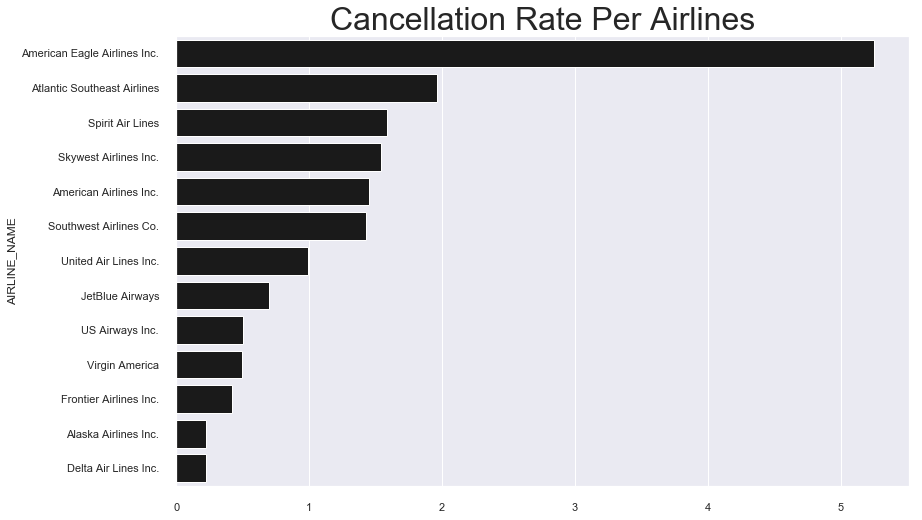

In [65]:
sns.barplot((list(airline_canl_ratio)),airline_canl_ratio.index,color='k')
plt.title('Cancellation Rate Per Airlines',size=32)


In [66]:

weather_Des = flights.CANCELLED[flights.CANCELLED==1].groupby(flights.DEST_summary).count().sort_values()


weather_Org = flights.CANCELLED[flights.CANCELLED==1].groupby(flights.ORG_summary).count().sort_values()
#weather_Org=weather_Org[weather_Org.Org.isin(b)]


<Figure size 1800x720 with 0 Axes>

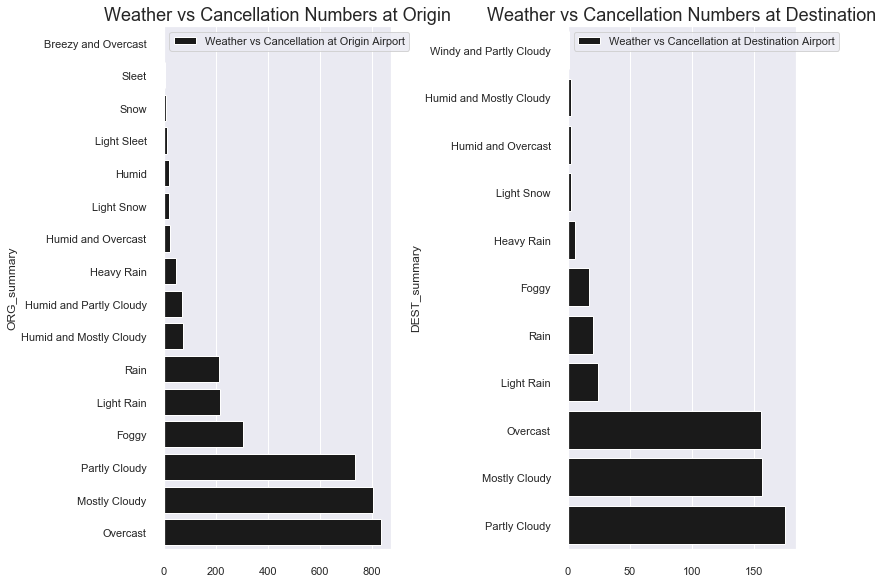

In [67]:
plt.figure(figsize=(25,10))

ax,fig =plt.subplots(1,2,squeeze=False)
plt.subplot(1,2,1)
plt.title ("Weather vs Cancellation Numbers at Origin",size=18)
sns.barplot((list(weather_Org)[:-1]),weather_Org.index[:-1],color='k' ,label="Weather vs Cancellation at Origin Airport")
plt.legend()

plt.subplot(1,2,2)
sns.barplot((list(weather_Des)[:-1]),weather_Des.index[:-1],color='k',label="Weather vs Cancellation at Destination Airport")
plt.legend()
plt.title ("Weather vs Cancellation Numbers at Destination",size=18)
plt.tight_layout()

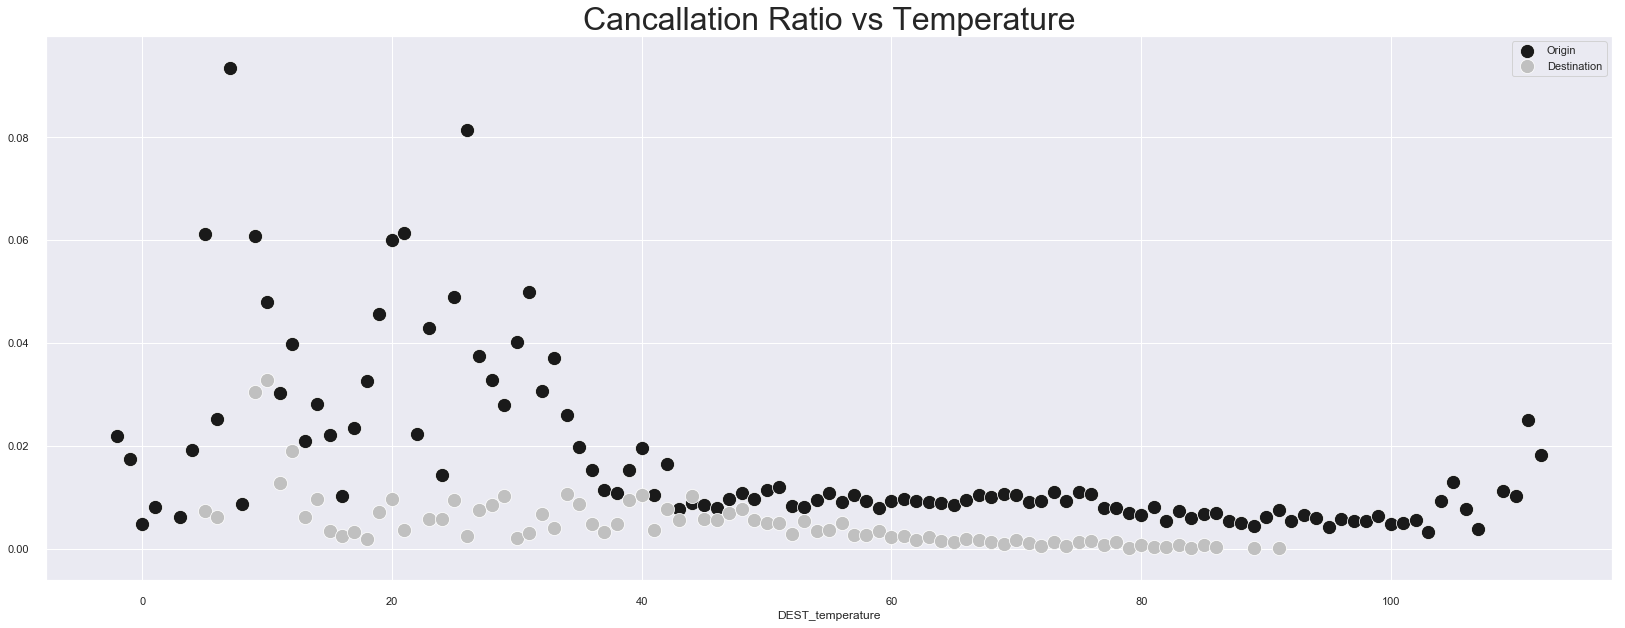

In [68]:
apparentTemperature=flights[['ORG_temperature','DEST_temperature','CANCELLED']]
apparentTemperature['ORG_temperature']=apparentTemperature['ORG_temperature'][apparentTemperature['ORG_temperature'].notnull()].astype(float).astype(int)
apparentTemperature['DEST_temperature']=apparentTemperature['DEST_temperature'][apparentTemperature['DEST_temperature'].notnull()].astype(float).astype(int)


plt.figure(figsize=(25,10))
a =(apparentTemperature['CANCELLED'][apparentTemperature['CANCELLED']==1].groupby(apparentTemperature.ORG_temperature).count())/(apparentTemperature['CANCELLED'].groupby(apparentTemperature.ORG_temperature).count())
a.sort_values(ascending=False)

b =(apparentTemperature['CANCELLED'][apparentTemperature['CANCELLED']==1].groupby(apparentTemperature.DEST_temperature).count())/(apparentTemperature['CANCELLED'].groupby(apparentTemperature.DEST_temperature).count())

b.sort_values(ascending=False)


sns.scatterplot(a.index,list(a),marker='o',s=200,label="Origin",color='k')
sns.scatterplot(b.index,list(b),marker='o',s=200,label="Destination",color='#C0C0C0')
plt.title('Cancallation Ratio vs Temperature',size=32)
plt.legend()

In [69]:
flights.DEST_humidity

0         0.41
1         0.53
2         0.75
3         0.43
4         0.49
5         0.54
6         0.86
7         0.53
8         0.86
9          NaN
10        0.71
11        0.71
12         NaN
13         NaN
14        0.74
15        0.46
16        0.71
17         NaN
18        0.88
19        0.74
20        0.45
21        0.74
22        0.40
23        0.42
24         NaN
25        0.37
26        0.85
27        0.68
28        0.31
29        0.32
          ... 
533153    0.28
533154    0.88
533155    0.45
533156    0.45
533157    0.38
533158    0.97
533159    0.75
533160    0.98
533161    0.28
533162    0.46
533163    0.31
533164    0.91
533165    0.94
533166    0.68
533167    0.57
533168    0.31
533169    0.18
533170    0.81
533171    0.38
533172    0.43
533173    0.67
533174    0.48
533175    0.94
533176    0.24
533177    0.78
533178    0.24
533179    0.44
533180     NaN
533181     NaN
533182     NaN
Name: DEST_humidity, Length: 533183, dtype: float64

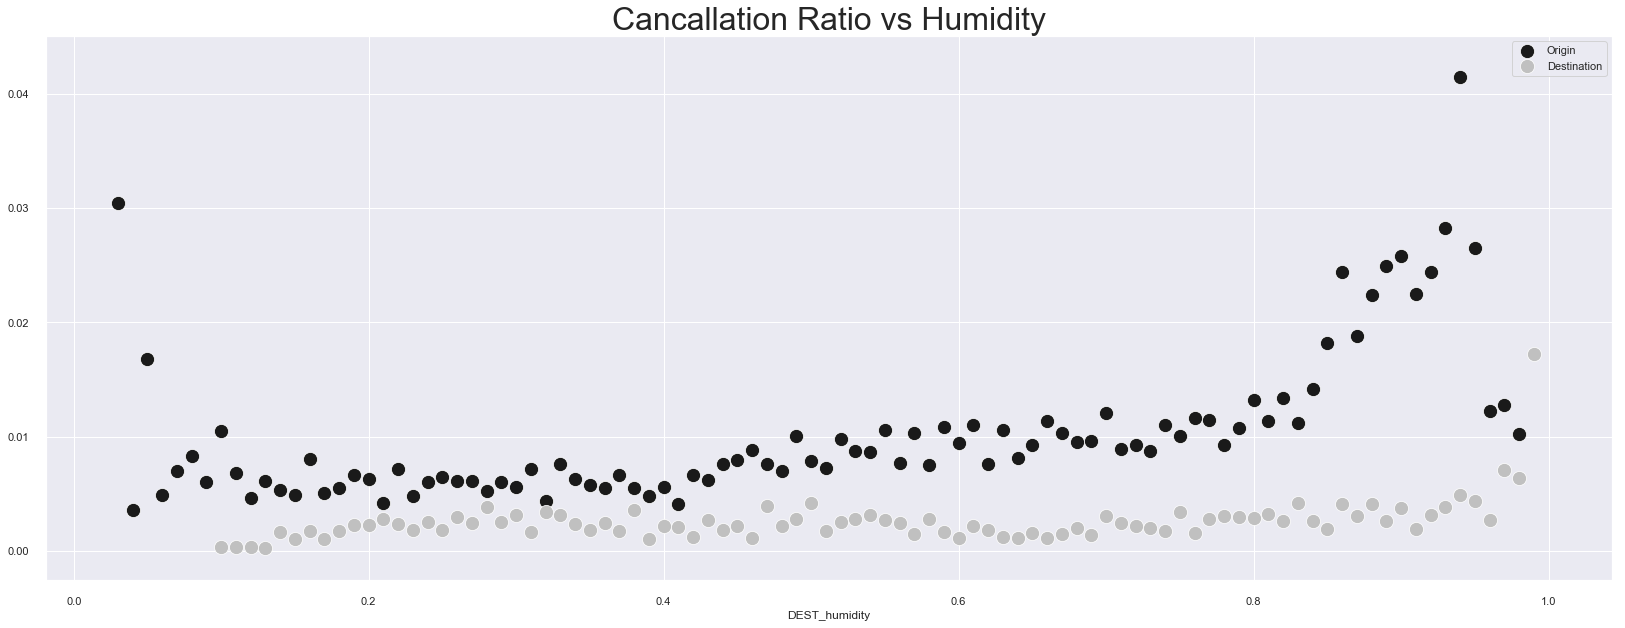

In [70]:
apparentTemperature=flights[['ORG_humidity','DEST_humidity','CANCELLED']]


plt.figure(figsize=(25,10))
a =(apparentTemperature['CANCELLED'][apparentTemperature['CANCELLED']==1].groupby(apparentTemperature.ORG_humidity).count())/(apparentTemperature['CANCELLED'].groupby(apparentTemperature.ORG_humidity).count())
a.sort_values(ascending=False)

b =(apparentTemperature['CANCELLED'][apparentTemperature['CANCELLED']==1].groupby(apparentTemperature.DEST_humidity).count())/(apparentTemperature['CANCELLED'].groupby(apparentTemperature.DEST_humidity).count())

b.sort_values(ascending=False)



sns.scatterplot(a.index,list(a),marker='o',s=200,label="Origin",color='k')
sns.scatterplot(b.index,list(b),marker='o',s=200,label="Destination",color='#C0C0C0')
plt.title('Cancallation Ratio vs Humidity',size=32)
plt.legend()

In [71]:
a

ORG_humidity
0.02         NaN
0.03    0.030457
0.04    0.003584
0.05    0.016779
0.06    0.004934
0.07    0.007011
0.08    0.008312
0.09    0.006008
0.10    0.010493
0.11    0.006847
0.12    0.004644
0.13    0.006118
0.14    0.005383
0.15    0.004882
0.16    0.008065
0.17    0.005106
0.18    0.005558
0.19    0.006687
0.20    0.006317
0.21    0.004199
0.22    0.007210
0.23    0.004797
0.24    0.006025
0.25    0.006492
0.26    0.006091
0.27    0.006103
0.28    0.005216
0.29    0.006069
0.30    0.005631
0.31    0.007206
          ...   
0.71    0.008913
0.72    0.009280
0.73    0.008768
0.74    0.011027
0.75    0.010044
0.76    0.011647
0.77    0.011427
0.78    0.009263
0.79    0.010789
0.80    0.013240
0.81    0.011390
0.82    0.013406
0.83    0.011161
0.84    0.014174
0.85    0.018216
0.86    0.024363
0.87    0.018782
0.88    0.022360
0.89    0.024961
0.90    0.025845
0.91    0.022476
0.92    0.024366
0.93    0.028271
0.94    0.041454
0.95    0.026546
0.96    0.012262
0.97    0.012782
0

In [75]:
b.sort_values(ascending=False).head()


DEST_humidity
0.99    0.017241
0.97    0.007133
0.98    0.006394
0.94    0.004900
0.95    0.004393
Name: CANCELLED, dtype: float64

In [ ]:
flight['departure_delay']=(pd.to_datetime(flight.DEPARTURE) -pd.to_datetime(flight.SCHEDULED_DEPARTURE)).apply(lambda x: x.total_seconds()/60)

In [ ]:
flight.to_csv('Project_Focus Folder/flight_6.1.csv')

In [ ]:
names= flight.ORIGIN_AIRPORT.groupby(flight.ORIGIN_AIRPORT).count()
names_=pd.DataFrame(names)
names_.columns=['Name']
names_.reset_index(level=0,inplace=True)
mergee=pd.merge(names_,airports[['LATITUDE','LONGITUDE']],left_on=names_.ORIGIN_AIRPORT,right_on=airports.IATA_CODE,how='inner')

In [ ]:
aa=airports[['IATA_CODE','AIRPORT']]
airport_count =pd.DataFrame(flight.ORIGIN_AIRPORT.groupby(flight.ORIGIN_AIRPORT).count())
airport_count.columns=['COUNT']
airport_count.reset_index(inplace=True)
aa.index=aa.IATA_CODE
aa=aa.AIRPORT.to_dict()
airport_count['NAME']=airport_count.ORIGIN_AIRPORT
airport_count['NAME']=airport_count['NAME'].replace(aa)
sorted_airport_count=airport_count.sort_values(by='COUNT').reset_index(drop=True)

In [ ]:
sns.set()
fig = plt.figure(num=None, figsize=(16, 8) )
y=sorted_airport_count.NAME
x=sorted_airport_count.COUNT
plt.tight_layout()
sns.barplot(x,y,color='b')
plt.xticks(rotation=0) 
plt.title('NUMBER OF FLIGHTS PER AIRPORT',size=24, weight='bold')

In [ ]:
 #create new figure, axes instances.
mergee['key_0']=mergee.key_0.replace(aa)
fig = plt.figure(num=None, figsize=(24, 16) )
m = Basemap(projection='merc',llcrnrlat=20,urcrnrlat=50,llcrnrlon=-130,urcrnrlon=-70,resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-90.,91.,30.),labels=[True,True,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[False,False,False,True],dashes=[2,2])

lons = mergee.LONGITUDE.tolist()
lats = mergee.LATITUDE.tolist()
x, y = m(lons, lats)
s=[]
for i in range(len(mergee.Name.tolist())):
    s.append(mergee.Name.tolist()[i]/50)
    
for i in range(10):
    plt.text(x[i],y[i],mergee.key_0[i],color='b',size=18,weight='bold')
m.scatter(x, y, marker='o',s=s, c=np.log10(s), cmap='plasma')

plt.title('LOCATION & NUMBER OF TRAFFICS OF THE TOP 10 ORIGIN AIRPORTS', size=40,weight='bold')
plt.show()

#plt.colorbar(orientation='vertical', shrink = 0.5)
#plt.legend([red_dot, (red_dot, white_cross)], ["Attr A", "Attr A+B"])

In [ ]:
mergee

In [ ]:
sns.barplot(mergee.Name,mergee.ORIGIN_AIRPORT,color='b')

In [ ]:

# Extract the data we're interested in
fig = plt.figure(num=None, figsize=(24, 16) )
m = Basemap(projection='merc',llcrnrlat=20,urcrnrlat=50,llcrnrlon=-130,urcrnrlon=-70,resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-90.,91.,30.),labels=[True,True,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[False,False,False,True],dashes=[2,2])

lat, lon = mergee['LATITUDE'].tolist(), mergee['LONGITUDE'].tolist()
population, area = mergee['Name'], mergee['Name']

# Scatter the points, using size and color but no label
x,y = m(lon, lat)
m.scatter(x, y, label=None,marker='o',
            c=np.log10(population/100), cmap='plasma',
            s=area/100, linewidth=0,)


plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(2.5, 4)

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in [100, 200, 300,400]:
    plt.scatter([], [], c='r', alpha=1, s=area,
                label=str(area) + 'K')
plt.legend(scatterpoints=1, frameon=False, labelspacing=2, title='Airport Traffic')

for i in range(10):
    plt.text(x[i],y[i],mergee.key_0[i],color='b',size=14,weight='bold')
m.scatter(x, y, marker='o',s=s, c=np.log10(s), cmap='plasma')


plt.title('Airport Location vs Traffic',size=34);

In [ ]:
flight['Comb_Names']=flight.ORIGIN_AIRPORT +flight.DESTINATION_AIRPORT

In [ ]:
merge1=pd.merge(flight,airports[['LATITUDE','LONGITUDE']],left_on=flight.ORIGIN_AIRPORT,right_on=airports.IATA_CODE,how='inner')
merge2=pd.merge(flight,airports[['LATITUDE','LONGITUDE']],left_on=flight.DESTINATION_AIRPORT,right_on=airports.IATA_CODE,how='inner')

In [ ]:
#merge1[['Comb_Names','LATITUDE','LONGITUDE']]
list1= merge1.Comb_Names.unique().tolist()
list2= merge2.Comb_Names.unique().tolist()

In [ ]:
lat1=[]
lon1=[]
for i in range(len(list1[:100])):
    lat1.append(merge1[merge1.Comb_Names==list1[i]].reset_index().LATITUDE[0])
    lon1.append(merge1[merge1.Comb_Names==list1[i]].reset_index().LONGITUDE[0])
lat2=[]
lon2=[]
for i in range(len(list1[:100])):
    lat2.append(merge2[merge2.Comb_Names==list1[i]].reset_index().LATITUDE[0])
    lon2.append(merge2[merge2.Comb_Names==list1[i]].reset_index().LONGITUDE[0])

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
fig = plt.figure(num=None, figsize=(24, 16) )
# create new figure, axes instances.
fig=plt.figure()
ax=fig.add_axes([0.1,0.1,0.8,0.8])
# setup mercator map projection.
m = Basemap(projection='merc',llcrnrlat=0,urcrnrlat=70,llcrnrlon=-180,urcrnrlon=-50,resolution='c')

for i in range(100):
    nylat = lat1[i]; nylon = lon1[i];
    # lonlat, lonlon are lat/lon of London.
    lonlat = lat2[i]; lonlon =lon2[i];
    m.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='r')
    # draw great circle route between NY and London  

m.drawcoastlines()
m.fillcontinents()
# draw parallels
m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
# draw meridians
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])
ax.set_title('Top 100 Most Common Routes')
plt.show()

In [ ]:
flight[['DATE','AIRLINE','ORIGIN_AIRPORT','SCHEDULED_DEPARTURE','DEPARTURE']].head()

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
time =flight.TIMEZONE_Diff.groupby(flight.ORIGIN_AIRPORT).mean()/-60
aa =flight.ORIGIN_AIRPORT.unique()
g=sns.barplot(time,aa,color='b')
plt.title('MEAN TIMEZONE DIFFERENCES',size=24, weight=18)


In [ ]:
flight['airlane_names']= flight.AIRLINE

In [ ]:
airport_names= pd.read_csv('Project_Focus Folder/airports.csv')

In [ ]:
airline_names= pd.read_csv('Project_Focus Folder/airlines.csv')
airline_names.index =airline_names.IATA_CODE
air=airline_names.AIRLINE.to_dict()


In [ ]:
flight['airlane_names']=flight['airlane_names'].replace(air)

In [ ]:
sizes=flight[['AIRLINE','airlane_names','ORIGIN_AIRPORT']]


In [ ]:
sizes =flight[['AIRLINE']].groupby([flight.AIRLINE,flight.airlane_names]).count()
sizes.columns=['NUMBER_OF_FLIGHTS']
sizes.reset_index(level= ['AIRLINE','airlane_names'], inplace=True)

In [ ]:
sizes=sizes.sort_values(by='NUMBER_OF_FLIGHTS',ascending=True)

In [ ]:
sizes['NAMES']= sizes.AIRLINE
sizes['NAMES']=sizes['NAMES'].replace(air)

In [ ]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 3.0  

#total_shceheduled = flight[['DEPARTURE']]

successfully_departed = flight[['DEPARTURE']].isnull()
#total_shceheduled
pie_ch =successfully_departed.DEPARTURE.groupby(successfully_departed.DEPARTURE)

plt.tight_layout(w_pad=3) 
plt.pie(pie_ch.count(),  labels=['Flights','Cancelled'], autopct='%.1d%%',shadow=True, startangle=90)
plt.title('Number of Flights per Airport')  
plt.show()

#{:.1f}%\n({:d} g)".format(pct, absolute)

In [ ]:
notnu=flight.AIRLINE[flight.DEPARTURE.notnull()].groupby(flight.AIRLINE).count()
canc=flight.AIRLINE[flight.DEPARTURE.isnull()].groupby(flight.AIRLINE).count()
notnu.index

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(sizes.airlane_names.tolist(), y=sizes.NUMBER_OF_FLIGHTS.tolist(),color='b')
plt.title('NUMBER OF FLIGHTS PER AIRLINES',fontsize=18)
plt.legend(ncol=4, loc="out", frameon=True)
plt.xticks(rotation=60) 

plt.tight_layout() 
plt.show()


In [ ]:
 
# Values of each group
bars1 = flight.AIRLINE[flight.DEPARTURE.notnull()].groupby(flight.AIRLINE).count()
bars2 = flight.AIRLINE[flight.DEPARTURE.isnull()].groupby(flight.AIRLINE).count()
temp=pd.DataFrame()
temp['bars2']=bars2
temp['bars1']=bars1
temp.reset_index(inplace=True)
temp['AIRLINE']=temp.AIRLINE.replace(air)
temp= temp.sort_values(by='bars1')
print(temp)
# Heights of bars1 + bars2
#bars = np.add(temp.bars1, temp.bars2).tolist()
 
# The position of the bars on the x-axis
r = np.arange(len(bars1))
 
# Names of group and bar width
names = temp.AIRLINE.tolist()
barWidth = 1
 
# Create brown bars
plt.bar(r, temp.bars1, color='#7f6d5f', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, temp.bars2, bottom=temp.bars1, color='#557f2d', edgecolor='white', width=barWidth)
# Create green bars (top)

# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xticks(rotation=90) 
plt.xlabel("group")
plt.title('Number of Cancellation per Airlines',size=24, weight='bold')
 
# Show graphic
plt.show()


In [ ]:
temp['total']=temp.bars2+temp.bars1
temp['bars2%']=(temp.bars2/temp.total)*100
temp['bars1%']=(temp.bars1/temp.total)*100

sns.set(rc={'figure.figsize':(12,6)})

r = np.arange(len(temp.total))
 
# Names of group and bar width
names = temp.AIRLINE.tolist()
barWidth = 1
 
# Create brown bars
plt.bar(r, temp['bars1%'], color='r', edgecolor='white', width=barWidth,label='Successful Flights')
# Create green bars (middle), on top of the firs ones
plt.bar(r, temp['bars2%'], bottom=temp['bars1%'], color='g', edgecolor='white', width=barWidth,label='Cancelled Flights')
# Create green bars (top)

# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xticks(rotation=90) 
plt.xlabel("group")
plt.title('Number of Cancellation per Airlines',size=24, weight='bold')
plt.legend(framealpha=1, frameon=True);
 
# Show graphic
plt.show()

In [ ]:
sizes

In [ ]:
list=[]
for i in air.values():
    list.append(i)

In [ ]:
explode = [.5 if sizes.NUMBER_OF_FLIGHTS[i] < 45000 else 0.0 for i in range(len(sizes))] # explode 1st slice
wedges, texts, autotexts=plt.pie(sizes.NUMBER_OF_FLIGHTS, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.legend(wedges, list ,title="Airports",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))


plt.axis('equal')
plt.tight_layout(w_pad=3) 
plt.title('Number of Flights per Company')
plt.show()

In [ ]:
flight['Airline_Names']=flight.AIRLINE
flight['Airline_Names']=flight['Airline_Names'].replace(air)

In [ ]:
delay =flight.departure_delay.groupby(flight.Airline_Names).mean()
print(delay)
delay_=delay.to_dict()

x=sorted(delay_.values())
y=[]

for i in range(len(x)):
    for j in delay_:
        if delay[j]==x[i]:
            y.append(j)

sns.barplot(x, y,color='gray')
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title('Mean Delay Times per Airlines',size=24, weight='bold')
plt.show()

In [ ]:
sns.scatterplot(x=flight.AIRLINE, y=flight.departure_delay)

In [ ]:
ax = sns.stripplot(x=flight.AIRLINE, y=flight.departure_delay)

In [ ]:
ax = sns.stripplot(x=flight.departure_delay, y=flight.Airline_Names,jitter=True)

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x=flight.departure_delay, y=flight.Airline_Names, whis=np.inf)
ax = sns.stripplot(x=flight.departure_delay, y=flight.Airline_Names,jitter=True,alpha=0.01)
plt.tight_layout()
plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(12,16)})
ax = sns.boxplot(x=flight.Airline_Names, y=flight.departure_delay, whis=np.inf)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [ ]:
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
flight['DELAY_LEVEL'] = flight['departure_delay'].apply(delay_type)

bars1 = flight.DELAY_LEVEL[flight.DELAY_LEVEL==0].groupby(flight.Airline_Names).count().tolist()
bars2 = flight.DELAY_LEVEL[flight.DELAY_LEVEL==1].groupby(flight.Airline_Names).count().tolist()
bars3 = flight.DELAY_LEVEL[flight.DELAY_LEVEL==2].groupby(flight.Airline_Names).count().tolist()

# Heights of bars1 + bars2
bars = np.add(bars1,bars2).tolist()
 
# The position of the bars on the x-axis
r = np.arange(14)
 
# Names of group and bar width
names = flight.Airline_Names.unique().tolist()
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1, color='blue', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='red', edgecolor='white', width=barWidth)
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='black', edgecolor='white', width=barWidth)
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("group")
plt.xticks(rotation=90)

plt.legend(['on time (t < 5 min)','small delay (5 < t < 45 min)','large delay (t > 45 min)'],loc=2)
plt.title('FLIGHT COUNT', size=24, weight='bold')



# Show graphic
plt.show()

In [ ]:
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
flight['DELAY_LEVEL'] = flight['departure_delay'].apply(delay_type)

ax = sns.countplot(y='AIRLINE', hue='DELAY_LEVEL', data=flight)

plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)

L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()
#do stack bar chart 

In [ ]:
alist=flight['AIRLINE'].unique().tolist()

for i in range(len(alist)):
    plt.tight_layout()
    #plt.subplot(7,2,i+1)
    x =  flight[flight['AIRLINE']==alist[i]]['departure_delay']
    mu = x.mean()
    median = x.median()
    sigma = x.std()
    textstr = '\n'.join((
        r'$\mu=%.2f$' % (mu, ),
        r'$\mathrm{median}=%.2f$' % (median, ),
        r'$\sigma=%.2f$' % (sigma, )))

    plt.hist(x = flight[flight['AIRLINE']==alist[i]]['departure_delay'],range = (1,100), normed=True, bins= 60)
    plt.title(alist[i])

    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    # place a text box in upper left in axes coords
    plt.text(0.5, 0.90, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top',horizontalalignment='left', bbox=props)
    plt.show()


In [ ]:
flight['DEPARTURE']=pd.to_datetime(flight['DEPARTURE'])

In [ ]:
alist=flight['AIRLINE'].unique().tolist()

x=[] #number of flights for each airlines
y= [] #median of delays for each airlines

for i in range(len(alist)):
    x.append(flight['AIRLINE'][flight['AIRLINE']==alist[i]].count())
    y.append(flight['departure_delay'][flight['AIRLINE']==alist[i]].median())
sns.regplot(x,y, x_estimator=np.mean) 
plt.xlabel('AIRLINE')
plt.ylabel('departure_delay')

for i in range(14):
    plt.text(x[i],y[i],alist[i],color='r')
    
plt.title('Number of Flights vs Median Delay Minutes',size=18)
plt.show()


In [ ]:
alist=flight['AIRLINE'].unique().tolist()
plt.cl
x=[] #number of flights for each airlines
y_mean =[] #mean of delays (min) for each airlines

for i in range(len(alist)):
    x.append(flight['AIRLINE'][flight['AIRLINE']==alist[i]].count())
    y_mean.append(flight['departure_delay'][flight['AIRLINE']==alist[i]].mean())
ax=sns.regplot(x,y_mean, x_estimator=np.mean) 
print(ax)
plt.xlabel('AIRLINE')
plt.ylabel('departure_delay')
for i in range(14):
    plt.text(x[i],y_mean[i],alist[i],color='r')
plt.title('Number of Flights vs Mean Delay Minutes',size=18)
plt.show()

In [ ]:
wh =flight[['summary','departure_delay']].groupby(flight.summary).mean().sort_values(by='departure_delay')
ax= sns.barplot(wh.index, wh.departure_delay,color='b')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
newdf = flight[['ORIGIN_AIRPORT','AIRLINE','departure_delay','summary']]

ap_dict={}
airport_list=flight.ORIGIN_AIRPORT.unique().tolist()
for i in range(len(airport_list)):
    ap_dict[airport_list[i]]=i+1

air_dict={}
airline_list=flight.AIRLINE.unique().tolist()
for i in range(len(airline_list)):
    air_dict[airline_list[i]]=i+1

ww_dict={}
weather_list=flight.summary.unique().tolist()
for i in range(len(weather_list)):
    ww_dict[weather_list[i]]=i+1

newdf['ORIGIN_AIRPORT']=newdf['ORIGIN_AIRPORT'].replace(ap_dict)
newdf['AIRLINE']=newdf['AIRLINE'].replace(air_dict)
newdf['Wearther']=newdf['summary'].replace(ww_dict)

corr =newdf[['ORIGIN_AIRPORT','AIRLINE','departure_delay','Wearther']].corr()

In [ ]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 3.0  

fig = plt.figure(1, figsize=(11,6))
bar1=flight["departure_delay"]
bar2=flight["ARRIVAL_DELAY"]

# Heights of bars1 + bars2
#bars = np.add(bars1,bars2).tolist()
 
# The position of the bars on the x-axis
r = np.arange(14)
 
    

# Names of group and bar width
names = flight.Airline_Names.unique().tolist()
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1, color='blue', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='red', edgecolor='white', width=barWidth,hatch = '///')
# Create green bars (top)

plt.xticks(r, names, fontweight='bold')
plt.xlabel("group")
plt.xticks(rotation=90)

    
ax.set_xticklabels(list)
ax.yaxis.label.set_visible(False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Mean delay (min) (departure: blue, arrival: hatch lines)',fontsize=14, weight = 'bold');
plt.title('Total Delays at Departure and Arrival',size=24)
plt.show()

In [ ]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 3.0  

fig = plt.figure(1, figsize=(11,6))
ax = sns.barplot(x="AIRLINE", y="departure_delay", data=flight, color="red", ci=None)
ax = sns.barplot(x="AIRLINE", y="ARRIVAL_DELAY", data=flight, color="r", hatch = '///',alpha = 0.0, ci=None)

list=[]
for item in ax.get_xticklabels():
    list.append(air[item.get_text()])
    
ax.set_xticklabels(list)
ax.yaxis.label.set_visible(False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Mean delay (min) (departure: blue, arrival: hatch lines)',fontsize=14, weight = 'bold');
plt.show()